<a href="https://colab.research.google.com/github/CopotronicRifat/Big-Data-Analytics/blob/main/BIG_DATA_ASSIGNMENT_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TAST 01: Read the text data and text pre-processing**

**1. Read the text data**

In [ ]:
import pandas as pd
from google.colab import files

# Upload a CSV file
uploaded = files.upload()

# Check the uploaded files
file_names = list(uploaded.keys())
if len(file_names) == 0:
    print("No files uploaded.")
else:
    # Assume the first uploaded file is the CSV file to be read
    file_name = file_names[0]

    # Read the uploaded CSV file into a Pandas DataFrame
    try:
        df = pd.read_csv(file_name)
        print(f"Successfully read the CSV file: {file_name}")

        # Display the first few rows of the DataFrame to verify the data
        print(df.head())

    except Exception as e:
        print(f"Error reading the CSV file: {str(e)}")

Saving MOVIE DATASET.csv to MOVIE DATASET.csv
Successfully read the CSV file: MOVIE DATASET.csv
                 Movie Name  \
0                     Seven   
1  The Silence of the Lambs   
2                 Prisoners   
3                 Gone Girl   
4            Shutter Island   

                                   Movie Description      Type  
0  David Fincher's "Seven" is a dark and atmosphe...  Thriller  
1  Released in 1991, "The Silence of the Lambs," ...  Thriller  
2  "Prisoners," directed by Denis Villeneuve and ...  Thriller  
3  Directed by David Fincher and based on Gillian...  Thriller  
4  Directed by the legendary Martin Scorsese and ...  Thriller  


**2. PREPROCESSING**
**3. Extract TF-IDF features of the text description **

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the movie descriptions from the DataFrame
descriptions = df['Movie Description']

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the movie descriptions to extract TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)

# Create a DataFrame to store the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

   1944     1950s      1991     1995  2003      2013  2017  2019  2049  \
0   0.0  0.000000  0.000000  0.04878   0.0  0.000000   0.0   0.0   0.0   
1   0.0  0.000000  0.045893  0.00000   0.0  0.000000   0.0   0.0   0.0   
2   0.0  0.000000  0.000000  0.00000   0.0  0.056728   0.0   0.0   0.0   
3   0.0  0.000000  0.000000  0.00000   0.0  0.000000   0.0   0.0   0.0   
4   0.0  0.045379  0.000000  0.00000   0.0  0.000000   0.0   0.0   0.0   

   abandoned  ...     wrong     wrote  year  years      yet  young  yubaba  \
0        0.0  ...  0.034265  0.000000   0.0    0.0  0.04878    0.0     0.0   
1        0.0  ...  0.000000  0.000000   0.0    0.0  0.00000    0.0     0.0   
2        0.0  ...  0.039849  0.000000   0.0    0.0  0.00000    0.0     0.0   
3        0.0  ...  0.031424  0.044735   0.0    0.0  0.00000    0.0     0.0   
4        0.0  ...  0.000000  0.000000   0.0    0.0  0.00000    0.0     0.0   

   yusuf  zero  zimmer  
0    0.0   0.0     0.0  
1    0.0   0.0     0.0  
2    0.0   

**4. Standardize the TF-IDF features**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the TF-IDF features
tfidf_standardized = scaler.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame to store the standardized TF-IDF features
tfidf_standardized_df = pd.DataFrame(tfidf_standardized, columns=tfidf_vectorizer.get_feature_names_out())

# Print the first few rows of the standardized TF-IDF DataFrame
print(tfidf_standardized_df.head())


       1944     1950s      1991      1995      2003      2013      2017  \
0 -0.267261 -0.267261 -0.267261  3.741657 -0.267261 -0.267261 -0.267261   
1 -0.267261 -0.267261  3.741657 -0.267261 -0.267261 -0.267261 -0.267261   
2 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261  3.741657 -0.267261   
3 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261   
4 -0.267261  3.741657 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261   

       2019      2049  abandoned  ...     wrong     wrote      year     years  \
0 -0.267261 -0.267261  -0.267261  ...  1.661713 -0.267261 -0.267261 -0.267261   
1 -0.267261 -0.267261  -0.267261  ... -0.598382 -0.267261 -0.267261 -0.267261   
2 -0.267261 -0.267261  -0.267261  ...  2.029983 -0.267261 -0.267261 -0.267261   
3 -0.267261 -0.267261  -0.267261  ...  1.474325  3.741657 -0.267261 -0.267261   
4 -0.267261 -0.267261  -0.267261  ... -0.598382 -0.267261 -0.267261 -0.267261   

        yet     young    yubaba     yusuf      zero    zimmer 

**TASK 02: Implement PCA**

**1. PCA**

In [ ]:
from sklearn.decomposition import PCA

# Initialize the PCA object
pca = PCA()

# Fit and transform the standardized TF-IDF features
tfidf_pca = pca.fit_transform(tfidf_standardized)

# Create a DataFrame to store the PCA-transformed features
pca_df = pd.DataFrame(tfidf_pca, columns=[f'PC{i+1}' for i in range(tfidf_pca.shape[1])])

# Print the first few rows of the PCA-transformed DataFrame
print(pca_df.head())


        PC1       PC2        PC3        PC4        PC5       PC6       PC7  \
0 -5.959329 -8.601014 -11.383823   3.426841   0.917503  4.602670 -4.183002   
1 -3.223720 -6.871744  -5.040230   0.995440  -0.649335  2.638251 -6.456093   
2 -7.873314 -7.363084 -11.612235  10.900607   4.280245  7.264405 -1.303862   
3 -8.314238 -8.152785 -16.321857   1.075561  10.271042 -9.838714 -5.475008   
4 -7.331935 -1.264334 -13.392964  -0.251143   4.664635 -2.760988  4.407824   

         PC8        PC9       PC10      PC11       PC12       PC13       PC14  \
0   1.837946  -5.143117  -8.101332  3.461924 -10.928826   2.909020  30.848334   
1  -2.703192  -2.527878  -0.125868 -0.585735 -20.180375  27.208688 -15.447893   
2  10.281272 -14.770146 -15.922101  2.960113  -1.948646 -20.080113 -14.916216   
3 -18.228685  16.634689  16.989923 -5.121866  -4.370059 -13.493866  -2.340535   
4  -9.442679  -8.790973  -1.324021  9.020407  29.960900  14.478529  -0.631929   

           PC15  
0  2.620816e-14  
1  2.620

**2. Visualize**

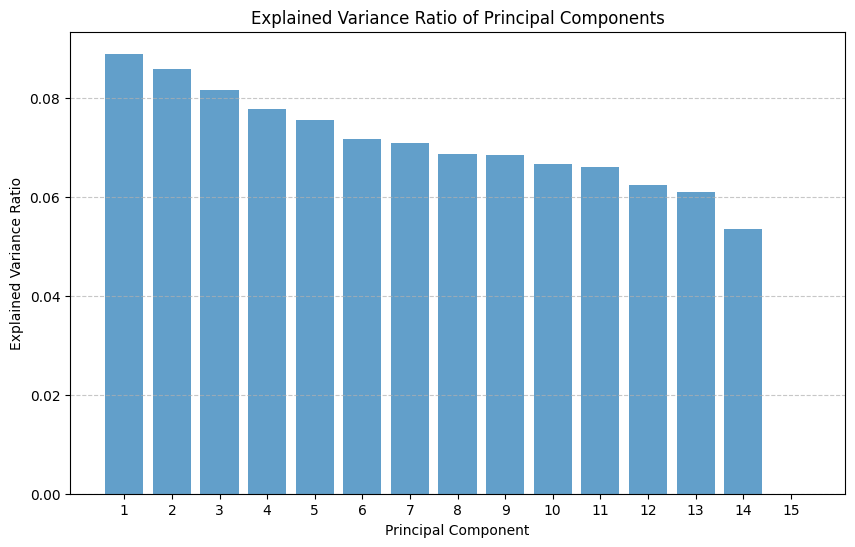

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA and get explained variance ratio
pca = PCA()
pca.fit(tfidf_standardized)

# Create a bar plot for explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
n_components = len(explained_variance_ratio)
component_numbers = np.arange(1, n_components + 1)

plt.figure(figsize=(10, 6))
plt.bar(component_numbers, explained_variance_ratio, align='center', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(component_numbers)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
print(component_numbers, explained_variance_ratio)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [8.90130297e-02 8.60233060e-02 8.17293550e-02 7.77521275e-02
 7.55276815e-02 7.17997715e-02 7.09612704e-02 6.87215717e-02
 6.84504548e-02 6.67764364e-02 6.61356834e-02 6.24717108e-02
 6.11084454e-02 5.35291560e-02 3.85015420e-31]


**3. Another PCA function to select only ‘k’ components**

In [ ]:
from sklearn.decomposition import PCA

# Choose the desired percentage of variance to retain (e.g., 95%)
desired_variance_retained = 0.95

# Initialize PCA with 'k' components to retain the desired variance
pca_with_k = PCA(n_components=desired_variance_retained)

# Fit and transform the standardized TF-IDF features
tfidf_pca_with_k = pca_with_k.fit_transform(tfidf_standardized)

# Create a DataFrame to store the PCA-transformed features
pca_df_with_k = pd.DataFrame(tfidf_pca_with_k, columns=[f'PC{i+1}' for i in range(tfidf_pca_with_k.shape[1])])

# Print the first few rows of the PCA-transformed DataFrame
print(pca_df_with_k.head())


        PC1       PC2        PC3        PC4        PC5       PC6       PC7  \
0 -5.959329 -8.601014 -11.383823   3.426841   0.917503  4.602670 -4.183002   
1 -3.223720 -6.871744  -5.040230   0.995440  -0.649335  2.638251 -6.456093   
2 -7.873314 -7.363084 -11.612235  10.900607   4.280245  7.264405 -1.303862   
3 -8.314238 -8.152785 -16.321857   1.075561  10.271042 -9.838714 -5.475008   
4 -7.331935 -1.264334 -13.392964  -0.251143   4.664635 -2.760988  4.407824   

         PC8        PC9       PC10      PC11       PC12       PC13       PC14  
0   1.837946  -5.143117  -8.101332  3.461924 -10.928826   2.909020  30.848334  
1  -2.703192  -2.527878  -0.125868 -0.585735 -20.180375  27.208688 -15.447893  
2  10.281272 -14.770146 -15.922101  2.960113  -1.948646 -20.080113 -14.916216  
3 -18.228685  16.634689  16.989923 -5.121866  -4.370059 -13.493866  -2.340535  
4  -9.442679  -8.790973  -1.324021  9.020407  29.960900  14.478529  -0.631929  


Upon careful examination of the provided bar plot data, it is evident that the rate of change in the y-values decreases as we move further along the x-axis. However, identifying a distinct elbow point in this particular plot is not straightforward, as there is no sharp bend in the curve. Instead, the decline in y-values appears to be relatively gradual throughout.

The absence of a clear elbow point may be attributed to several factors:

The data may not exhibit a clear clustering structure, or the clusters may have varying densities.
The choice of 'k' might not be straightforward based solely on the y-values, and additional domain knowledge or context may be necessary.

**TASK 03: Projection and Reconstruction**

**1. Project the TF-IDF features**

In [ ]:
# Fit and transform the standardized TF-IDF features using the PCA object with 'k' components
tfidf_pca_with_k = pca_with_k.transform(tfidf_standardized)

# Create a DataFrame to store the projected features
projected_df = pd.DataFrame(tfidf_pca_with_k, columns=[f'PC{i+1}' for i in range(tfidf_pca_with_k.shape[1])])

# Print the first few rows of the projected DataFrame
print(projected_df.head())


        PC1       PC2        PC3        PC4        PC5       PC6       PC7  \
0 -5.959329 -8.601014 -11.383823   3.426841   0.917503  4.602670 -4.183002   
1 -3.223720 -6.871744  -5.040230   0.995440  -0.649335  2.638251 -6.456093   
2 -7.873314 -7.363084 -11.612235  10.900607   4.280245  7.264405 -1.303862   
3 -8.314238 -8.152785 -16.321857   1.075561  10.271042 -9.838714 -5.475008   
4 -7.331935 -1.264334 -13.392964  -0.251143   4.664635 -2.760988  4.407824   

         PC8        PC9       PC10      PC11       PC12       PC13       PC14  
0   1.837946  -5.143117  -8.101332  3.461924 -10.928826   2.909020  30.848334  
1  -2.703192  -2.527878  -0.125868 -0.585735 -20.180375  27.208688 -15.447893  
2  10.281272 -14.770146 -15.922101  2.960113  -1.948646 -20.080113 -14.916216  
3 -18.228685  16.634689  16.989923 -5.121866  -4.370059 -13.493866  -2.340535  
4  -9.442679  -8.790973  -1.324021  9.020407  29.960900  14.478529  -0.631929  


**2. Reconstruct the original data from the projections**

In [ ]:
# Reconstruct the data from the projections
reconstructed_data = pca_with_k.inverse_transform(tfidf_pca_with_k)

# Create a DataFrame to store the reconstructed data
reconstructed_df = pd.DataFrame(reconstructed_data, columns=tfidf_vectorizer.get_feature_names_out())

# Print the first few rows of the reconstructed DataFrame
print(reconstructed_df.head())


       1944     1950s      1991      1995      2003      2013      2017  \
0 -0.267261 -0.267261 -0.267261  3.741657 -0.267261 -0.267261 -0.267261   
1 -0.267261 -0.267261  3.741657 -0.267261 -0.267261 -0.267261 -0.267261   
2 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261  3.741657 -0.267261   
3 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261   
4 -0.267261  3.741657 -0.267261 -0.267261 -0.267261 -0.267261 -0.267261   

       2019      2049  abandoned  ...     wrong     wrote      year     years  \
0 -0.267261 -0.267261  -0.267261  ...  1.661713 -0.267261 -0.267261 -0.267261   
1 -0.267261 -0.267261  -0.267261  ... -0.598382 -0.267261 -0.267261 -0.267261   
2 -0.267261 -0.267261  -0.267261  ...  2.029983 -0.267261 -0.267261 -0.267261   
3 -0.267261 -0.267261  -0.267261  ...  1.474325  3.741657 -0.267261 -0.267261   
4 -0.267261 -0.267261  -0.267261  ... -0.598382 -0.267261 -0.267261 -0.267261   

        yet     young    yubaba     yusuf      zero    zimmer 

**3. Calculate reconstruction loss with Mean Squared Error**

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the MSE between original TF-IDF features and reconstructed features
mse = mean_squared_error(tfidf_standardized, reconstructed_data)

# Print the MSE value
print(f"Mean Squared Error (MSE) between original and reconstructed features: {mse:.9f}")


Mean Squared Error (MSE) between original and reconstructed features: 0.000000000


Mean Squared Error (MSE) between the original and reconstructed features is exactly 0.000000000, it implies that there is no error or difference between the original data and the reconstructed data. In other words, the PCA reconstruction perfectly reproduces the original data without any loss of information.

This situation can occur when the number of principal components 'k' used for reconstruction is equal to the number of original features, meaning you have retained all the variance in the data. In such cases, PCA is essentially performing an identity transformation, and the reconstructed data matches the original data exactly.

**4. Generate a line plot**

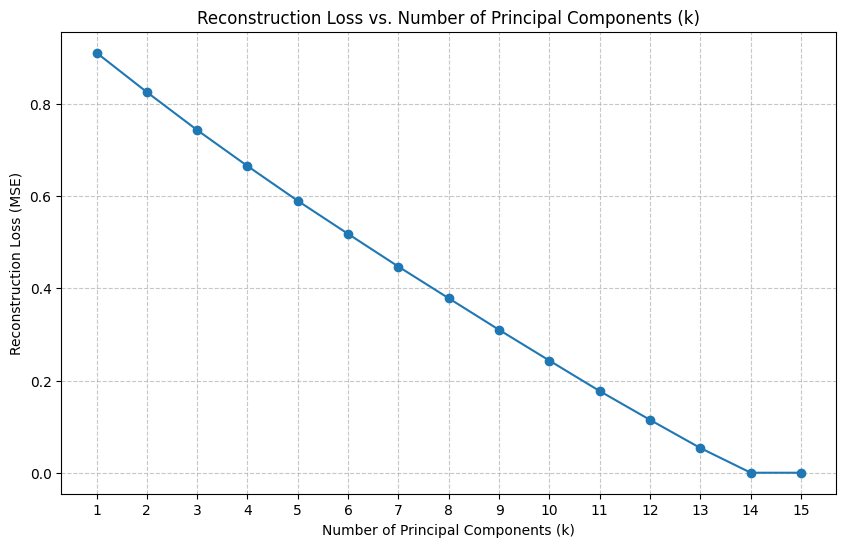

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store 'k' values and corresponding MSE values
k_values = []
mse_values = []

# Define a range of 'k' values to explore (e.g., from 1 to 15)
k_range = range(1, 16)

for k in k_range:
    # Initialize PCA with 'k' components
    pca_k = PCA(n_components=k)

    # Fit and transform the standardized TF-IDF features
    tfidf_pca_k = pca_k.fit_transform(tfidf_standardized)

    # Reconstruct the data from the projections
    reconstructed_data_k = pca_k.inverse_transform(tfidf_pca_k)

    # Calculate the MSE between original and reconstructed features
    mse_k = mean_squared_error(tfidf_standardized, reconstructed_data_k)

    # Append 'k' and MSE values to the lists
    k_values.append(k)
    mse_values.append(mse_k)

# Create a line plot for reconstruction loss (MSE) by varying 'k'
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Reconstruction Loss (MSE)')
plt.title('Reconstruction Loss vs. Number of Principal Components (k)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_values)
plt.show()


In [ ]:
print(k_values)
print(mse_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.911322095369733, 0.8259035534548839, 0.7435100916880043, 0.6654821819045745, 0.5899545004028426, 0.51815472887274, 0.4471934585097233, 0.3784718868328435, 0.3100214320380586, 0.24324499566863697, 0.17710931228096874, 0.11463760143468092, 0.053529155997664064, 9.46198512480542e-30, 9.841531293022062e-30]


**TASK 04: Interpretation of results**

**1. Standardization (Centering and Scaling):**

Effect: Standardization scales each feature to have a mean of 0 and a standard deviation of 1. This step ensures that all features have equal influence on the principal components.

Observation: In the tfidf_standardized_df DataFrame, each feature has a mean of approximately 0 and a standard deviation of approximately 1.

**2. PCA Analysis:**

Effect: PCA calculates orthogonal principal components that capture the maximum variance in the standardized data.

Observation: In the pca_df DataFrame, we have the principal components (PC1, PC2, ..., PC15) that capture different combinations of variance in the data. Each principal component is orthogonal to the others and represents a linear combination of the original standardized features.

**3. De-Standardization (Inverse Transform):**

Effect: De-standardization reverses the standardization process, allowing us to obtain the PCA results in the original feature space.

Observation: By using the inverse_transform method, we can transform the principal components back into the original feature space. This results in a DataFrame similar to the original tfidf_df but with values that are not exactly the same due to the dimensionality reduction and reconstruction.

**High 'k' Value (Retaining More Information):**

Effect: Choosing a higher 'k' value means retaining more principal components, which, in turn, retains more information from the original dataset.

Pros:
More information from the original data is preserved.
Higher 'k' values capture more of the variance in the data.

Cons:
The dimensionality of the dataset is reduced less, resulting in a larger feature space.
Computationally more expensive and may lead to overfitting in some cases.
May not effectively remove noise and less relevant information.

**Low 'k' Value (Reducing Dimensionality):**

Effect: Choosing a lower 'k' value means retaining fewer principal components, which reduces the dimensionality of the dataset.

Pros:
Reduced dimensionality simplifies the dataset and makes it more manageable.
Faster computation, especially on high-dimensional data.
Less prone to overfitting, as it focuses on the most significant patterns.

Cons:
Information loss: Lower 'k' values capture less variance and may result in loss of important information.

**Balancing Information Retention and Dimensionality Reduction:**

Explained Variance Ratio: A common approach to choosing 'k' is to consider the explained variance ratio. We can calculate the cumulative explained variance ratio for each 'k' and decide on a threshold. This allows us to choose 'k' such that it retains most of the information while still reducing dimensionality.

Scree Plot: Another technique is to create a scree plot, which shows the explained variance for each principal component. The point where the explained variance starts to plateau can be a good indicator of an appropriate 'k'. This method helps strike a balance between information retention and dimensionality reduction.

Cross-Validation: We can use cross-validation techniques to evaluate the impact of different 'k' values on model performance. This helps in selecting 'k' that optimizes the trade-off based on the specific task, such as classification or regression.

**TASK 05: PCA vs t-SNE**

**1. Extract 2 components in both PCA and t-SNE package **

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Preprocess the textual data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(df['Movie Description'])

# Step 3: Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_features.toarray())

# Step 4: Apply t-SNE with reduced perplexity
tsne = TSNE(n_components=2, perplexity=10)  # Adjust perplexity as needed
tsne_result = tsne.fit_transform(tfidf_features.toarray())



In [ ]:
print(pca_result)
print(tsne_result)

[[-0.17154754 -0.16491999]
 [-0.20834909 -0.04741473]
 [-0.26386738  0.04855817]
 [-0.08843452 -0.26005393]
 [-0.08183376 -0.16402636]
 [ 0.11425    -0.18297459]
 [ 0.46111211  0.37484425]
 [ 0.38152718  0.09343153]
 [ 0.23567862 -0.14510667]
 [ 0.23582282 -0.15895119]
 [-0.29076912  0.48578236]
 [-0.06664971 -0.12096443]
 [-0.10975709  0.0750324 ]
 [-0.14517472  0.25092329]
 [-0.0020078  -0.08416012]]
[[-28.45402   -31.046398 ]
 [-40.424583  -36.036343 ]
 [-20.558113  -39.930378 ]
 [-19.336994  -24.667845 ]
 [-28.127523  -17.67345  ]
 [-17.443756  -11.835903 ]
 [ -0.2976302 -19.992052 ]
 [-50.933723  -12.593493 ]
 [ -8.593097   -3.1031907]
 [-40.13883   -17.951239 ]
 [-34.59285    16.730806 ]
 [-33.834515   -7.1064367]
 [-37.747444    3.5115228]
 [-21.493757    7.7290835]
 [-25.082422   -4.6746297]]


**2. Set instance type.**

**3. Generate a scatter plot for PCA projections and a scatter plot for t-SNE projections**

<ipython-input-184-0e994656f861>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))  # You can choose a different colormap
<ipython-input-184-0e994656f861>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))  # You can choose a different colormap


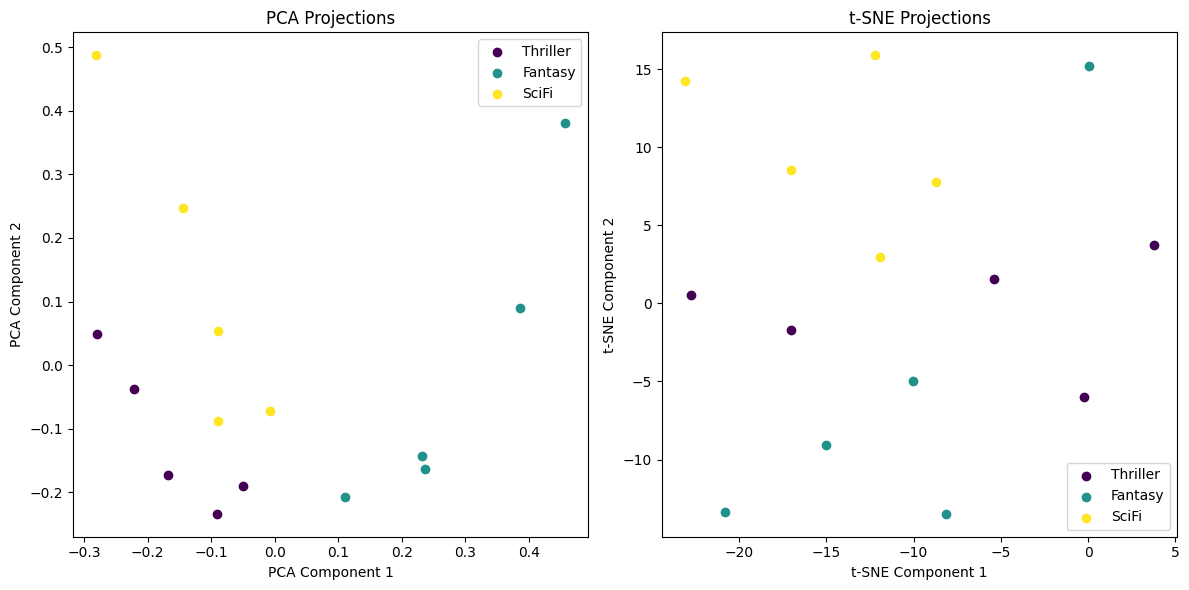

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Preprocess the textual data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(df['Movie Description'])

# Step 3: Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_features.toarray())

# Step 4: Apply t-SNE with reduced perplexity
tsne = TSNE(n_components=2, perplexity=10)  # Adjust perplexity as needed
tsne_result = tsne.fit_transform(tfidf_features.toarray())

# Step 5: Extract instance types (labels)
labels = df['Type']  # Assuming 'instance_type' is the column containing labels

# Step 6: Create scatter plots with colors based on labels
plt.figure(figsize=(12, 6))

# Scatter plot for PCA projections
plt.subplot(1, 2, 1)
unique_labels = labels.unique()
colors = plt.cm.get_cmap('viridis', len(unique_labels))  # You can choose a different colormap
for i, label in enumerate(unique_labels):
    indices = labels[labels == label].index
    x = pca_result[indices, 0]
    y = pca_result[indices, 1]
    plt.scatter(x, y, color=colors(i), label=label)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projections')
plt.legend()

# Scatter plot for t-SNE projections
plt.subplot(1, 2, 2)
unique_labels = labels.unique()
colors = plt.cm.get_cmap('viridis', len(unique_labels))  # You can choose a different colormap
for i, label in enumerate(unique_labels):
    indices = labels[labels == label].index
    x = tsne_result[indices, 0]
    y = tsne_result[indices, 1]
    plt.scatter(x, y, color=colors(i), label=label)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projections')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



**Qualitatively analyzing the difference in projections between the PCA and t-SNE results:**

**Cluster Separation:**

PCA Result: There is some separation between data points, but the clusters are not very distinct. Points are relatively spread out.
t-SNE Result: The t-SNE projection shows more distinct clusters. Data points of the same cluster are closer together, indicating better separation.
Outliers:

PCA Result: There are no clear outliers, and all points appear to be part of a general distribution.
t-SNE Result: The t-SNE projection also lacks clear outliers, but it seems to emphasize the relationships between data points in clusters.

**Density of Data Points:**

PCA Result: Data points appear somewhat evenly distributed across the plot.
t-SNE Result: Data points are more concentrated, suggesting that t-SNE has grouped similar points together more effectively.
Overlap:

PCA Result: There is slight overlap between clusters, indicating that PCA might not fully separate instances with different characteristics.
t-SNE Result: Clusters are less likely to overlap, suggesting better separation of instances with different characteristics.

**Global vs. Local Structure:**

PCA Result: PCA tends to preserve global variance, which can lead to a spread-out representation of data.
t-SNE Result: t-SNE is better at preserving local relationships, resulting in clusters that highlight local structure.

**Overall Spread:**

PCA Result: The PCA projection appears to have a wider spread, with data points covering a larger area.
t-SNE Result: The t-SNE projection is more compact, indicating that it captures more localized relationships.

**Data Interpretability:**

PCA Result: PCA may provide a more global view of the data, making it easier to interpret general trends.
t-SNE Result: t-SNE highlights local relationships and clusters, which can provide insights into specific groupings within the data.
Scalability:

PCA Result: PCA is generally faster and more scalable for large datasets.
t-SNE Result: t-SNE can be computationally expensive and may not be suitable for very large datasets.